 导入包

In [1]:
import torch
import numpy as np
import random
from torch.utils.data import  Dataset
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

全局变量

In [2]:
batch_size=512
lr  = 0.001
epoch_num = 20
num_workers=0

构造数据集

In [3]:
random.seed(42)
torch.manual_seed(42)
class MultiDataSet(Dataset):
    def __init__(self, root, train=True, transform=None, download=True):
        self.mnist = torchvision.datasets.MNIST(root=root, train=train, download=download, transform=transform)
        self.targets = torch.eye(10)[self.mnist.targets]

    def __getitem__(self, index):
        image, target = self.mnist[index]
        processed_target = self.targets[index]
        return image, processed_target, target

    def __len__(self):
        return len(self.mnist)

mnist_train = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=True,
                                    download=True, transform=transforms.ToTensor())
mnist_test = MultiDataSet(root='E:/毕设文件/DeepLearning/experiment01/Datasets/MNIST', train=False,
                                   download=True, transform=transforms.ToTensor())
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True,num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False,num_workers=num_workers)

定义模型，定义优化器，损失函数
- 其中Net激活函数为Relu
- Net1为Tanh
- Net2为Elu

In [4]:
inputs = 784
hiddens = 256
out = 10
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(inputs,hiddens)
        self.relu = torch.nn.ReLU()
        self.hidden = torch.nn.Linear(hiddens,out)
        self.softmax = torch.nn.Softmax(dim=1)
    def forward(self,x):
        x = x.view(x.size(0), -1)
        t = self.linear(x)
        t = self.relu(t)
        t = self.hidden(t)
        t = self.softmax (t)
        return  t

class Net1(torch.nn.Module):
     def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(inputs,hiddens)
        self.tanh = torch.nn.Tanh()
        self.hidden = torch.nn.Linear(hiddens,out)
        self.softmax = torch.nn.Softmax(dim=1)
     def forward(self,x):
        x = x.view(x.size(0), -1)
        t = self.linear(x)
        t = self.tanh(t)
        t = self.hidden(t)
        t = self.softmax (t)
        return  t

class Net2(torch.nn.Module):
     def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(inputs,hiddens)
        self.elu = torch.nn.ELU()
        self.hidden = torch.nn.Linear(hiddens,out)
        self.softmax = torch.nn.Softmax(dim=1)
     def forward(self,x):
        x = x.view(x.size(0), -1)
        t = self.linear(x)
        t = self.elu(t)
        t = self.hidden(t)
        t = self.softmax (t)
        return  t


loss =  torch.nn.CrossEntropyLoss()


训练与对比评估

In [5]:
import time

train_loss_0 =[]
test_loss_0 = []
train_acc_0=[]
test_acc_0= []
start_time = time.time()
net0 = Net().to(device)
opt0 = torch.optim.Adam(params=net0.parameters(),lr=lr)
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:

        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net0(x.to(device))
        l = loss(y_hat,y.to(device))
        opt0.zero_grad()
        l.backward()
        opt0.step()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss_0.append(train_loss_mean)
    train_acc_0.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net0(x.to(device))
        l = loss(y_hat,y.to(device))
        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss_0.append(test_loss_mean)
    test_acc_0.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 1.7504205734301836 train_acc: 0.7896801549145299 
 test_loss: 1.5793566641054655 test_acc: 0.906969572368421
epoch: 2 
 train_loss: 1.562273360725142 train_acc: 0.9159488514957265 
 test_loss: 1.543465112384997 test_acc: 0.927734375
epoch: 3 
 train_loss: 1.5410092977377086 train_acc: 0.9307725694444444 
 test_loss: 1.5341171402680247 test_acc: 0.9347245065789473
epoch: 4 
 train_loss: 1.529534401037754 train_acc: 0.9398871527777778 
 test_loss: 1.5237039390363192 test_acc: 0.9431537828947368
epoch: 5 
 train_loss: 1.5205218088932526 train_acc: 0.9483006143162394 
 test_loss: 1.5181009267505847 test_acc: 0.9475740131578947
epoch: 6 
 train_loss: 1.514109619662293 train_acc: 0.9534922542735043 
 test_loss: 1.5134413681532208 test_acc: 0.9512746710526315
epoch: 7 
 train_loss: 1.5090504864342191 train_acc: 0.9579827724358975 
 test_loss: 1.5100786434976678 test_acc: 0.955078125
epoch: 8 
 train_loss: 1.5045931604173448 train_acc: 0.9621561164529915 
 test_loss: 1.5

In [6]:
import time

train_loss_1 =[]
test_loss_1 = []
train_acc_1=[]
test_acc_1= []
start_time = time.time()

net1 = Net1().to(device)
opt1 = torch.optim.Adam(params=net1.parameters(),lr=lr)
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:

        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net1(x.to(device))
        l = loss(y_hat,y.to(device))
        opt1.zero_grad()

        l.backward()
        opt1.step()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss_1.append(train_loss_mean)
    train_acc_1.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net1(x.to(device))
        l = loss(y_hat,y.to(device))
        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss_1.append(test_loss_mean)
    test_acc_1.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 1.7218169870539608 train_acc: 0.8004974626068376 
 test_loss: 1.5689016580581665 test_acc: 0.912828947368421
epoch: 2 
 train_loss: 1.5606773480390892 train_acc: 0.9171507745726496 
 test_loss: 1.544330082441631 test_acc: 0.9281455592105263
epoch: 3 
 train_loss: 1.5415902280399942 train_acc: 0.931106436965812 
 test_loss: 1.5340383742984973 test_acc: 0.9377055921052632
epoch: 4 
 train_loss: 1.5303001577018673 train_acc: 0.9401208600427351 
 test_loss: 1.5250154357207448 test_acc: 0.9431537828947368
epoch: 5 
 train_loss: 1.5216299346369555 train_acc: 0.947532719017094 
 test_loss: 1.5182661006325169 test_acc: 0.9494243421052632
epoch: 6 
 train_loss: 1.514648315234062 train_acc: 0.9536424946581197 
 test_loss: 1.5147813809545416 test_acc: 0.9527138157894737
epoch: 7 
 train_loss: 1.5091423478900876 train_acc: 0.9587673611111112 
 test_loss: 1.5095244646072388 test_acc: 0.95703125
epoch: 8 
 train_loss: 1.5049968784690921 train_acc: 0.9624232104700855 
 test_los

In [7]:
import time

train_loss_2 =[]
test_loss_2 = []
train_acc_2=[]
test_acc_2= []
start_time = time.time()
net2 = Net2().to(device)
opt2 = torch.optim.Adam(params=net2.parameters(),lr=lr)
for epoch in range(epoch_num):
    loss_list=[]
    acc_list=[]
    for data in train_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net2(x.to(device))
        l = loss(y_hat,y.to(device))
        opt2.zero_grad()
        l.backward()
        opt2.step()
        y_index = torch.argmax(y_hat, dim=1)
        loss_list.append(l.item())
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))

    train_loss_mean = np.mean(loss_list)
    train_acc_mean = np.mean(acc_list)
    train_loss_2.append(train_loss_mean)
    train_acc_2.append(train_acc_mean)
    loss_list=[]
    acc_list=[]
    for data in test_iter:
        x, y, index =data
        if x.shape[0]<batch_size:
            continue
        y_hat = net2(x.to(device))
        l = loss(y_hat,y.to(device))

        loss_list.append(l.item())
        y_index = torch.argmax(y_hat, dim=1)
        acc = 0
        for i in range(len(y_index)):
            if y_index[i] == index[i]:
                acc += 1
        acc_list.append(acc/len(y_index))


    test_loss_mean = np.mean(loss_list)
    test_acc_mean = np.mean(acc_list)
    test_loss_2.append(test_loss_mean)
    test_acc_2.append(test_acc_mean)
    print("epoch:",epoch+1,"\n",
          "train_loss:",train_loss_mean,"train_acc:",train_acc_mean,
          "\n",
          "test_loss:",test_loss_mean,"test_acc:",test_acc_mean
          )
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

epoch: 1 
 train_loss: 1.7084133013700828 train_acc: 0.8302617521367521 
 test_loss: 1.5661320058923018 test_acc: 0.912109375
epoch: 2 
 train_loss: 1.5607911694763053 train_acc: 0.9136618589743589 
 test_loss: 1.545554650457282 test_acc: 0.92578125
epoch: 3 
 train_loss: 1.5464501686585255 train_acc: 0.9236611912393162 
 test_loss: 1.5382111009798551 test_acc: 0.9310238486842105
epoch: 4 
 train_loss: 1.5380103618670733 train_acc: 0.9304220085470085 
 test_loss: 1.5309954567959434 test_acc: 0.9359580592105263
epoch: 5 
 train_loss: 1.531043851477468 train_acc: 0.9359475160256411 
 test_loss: 1.527046611434535 test_acc: 0.9400699013157895
epoch: 6 
 train_loss: 1.5250949941129766 train_acc: 0.941673344017094 
 test_loss: 1.5225697002912824 test_acc: 0.942639802631579
epoch: 7 
 train_loss: 1.5197545850378835 train_acc: 0.9466479700854701 
 test_loss: 1.518917911931088 test_acc: 0.9463404605263158
epoch: 8 
 train_loss: 1.514716698573186 train_acc: 0.9509882478632479 
 test_loss: 1.5150

模型评估
1. Net（ReLU激活函数）运行322秒：
- epoch 1：损失为1.579，准确率为约90.70%。
- epoch 20：损失下降到1.490，准确率提高到约97.31%。
2. Net1（Tanh激活函数）运行319秒：
- epoch 1：损失为1.569，准确率为约91.28%。
- epoch 20：损失下降到1.490，准确率提高到约97.39%。
3. Net2（ELU激活函数）运行313秒：
- epoch 1：损失为1.566，准确率为约91.21%。
- epoch 20：损失下降到1.494，准确率提高到约96.85%。


随着训练的进行，损失都在下降，准确率在提高。这表明所有的模型都在训练数据上逐渐优化。
Net1（Tanh激活函数）在初始阶段具有稍微较高的准确率，但随着训练的进行，三个模型的准确率最终都接近。
使用不同激活函数并没有显著影响模型的最终性能。在这个任务中，ReLU、Tanh和ELU都表现得相对良好

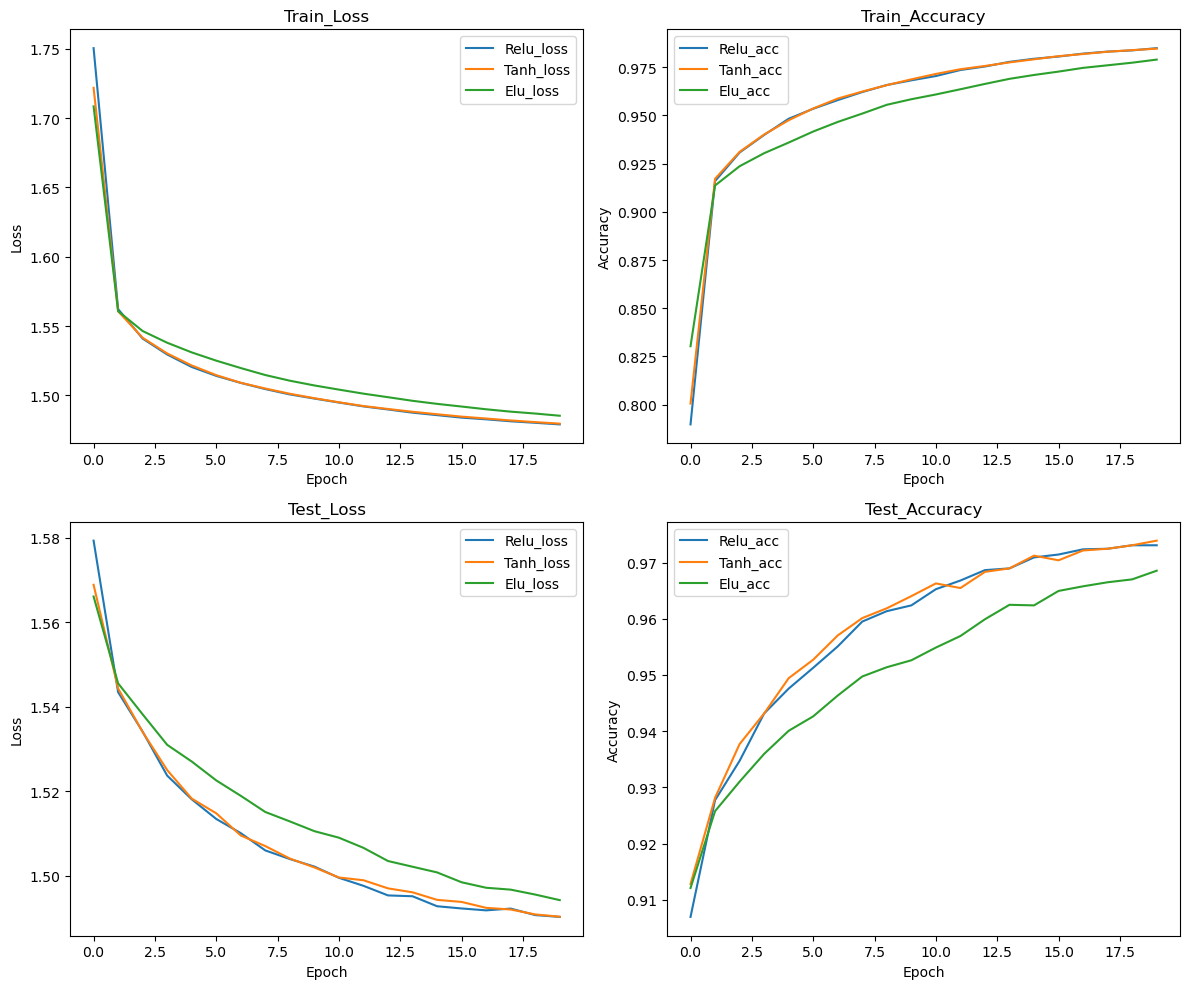

In [15]:
# 示例数据
train_loss = [train_loss_0, train_loss_1, train_loss_2]
test_loss = [test_loss_0, test_loss_1, test_loss_2]
train_acc = [train_acc_0, train_acc_1, train_acc_2]
test_acc = [test_acc_0, test_acc_1, test_acc_2]
titles_loss = ['Train_Loss', 'Test_Loss']
titles_acc = ['Train_Accuracy', 'Test_Accuracy']
labels = ['Relu', 'Tanh', 'Elu']

# 创建2x2的图，并添加脚标
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 绘制Train_Loss和Test_Loss
for i in range(3):
    ax_train_loss = axes[0, 0]
    ax_train_loss.plot(train_loss[i], label=f'{labels[i]}_loss')

    ax_test_loss = axes[1, 0]
    ax_test_loss.plot(test_loss[i], label=f'{labels[i]}_loss')

# 绘制Train_Accuracy和Test_Accuracy
for i in range(3):
    ax_train_acc = axes[0, 1]
    ax_train_acc.plot(train_acc[i], label=f'{labels[i]}_acc')

    ax_test_acc = axes[1, 1]
    ax_test_acc.plot(test_acc[i], label=f'{labels[i]}_acc')

# 设置标题和标签
for ax in axes.flat:
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss' if ax in [axes[0, 0], axes[1, 0]] else 'Accuracy')

axes[0, 0].set_title(titles_loss[0])
axes[0, 0].legend()

axes[1, 0].set_title(titles_loss[1])
axes[1, 0].legend()

axes[0, 1].set_title(titles_acc[0])
axes[0, 1].legend()

axes[1, 1].set_title(titles_acc[1])
axes[1, 1].legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()
